In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
from numpy import random
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px # data visualization

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
import sklearn.metrics as metrics
import statsmodels.api as sm

# %config InlineBackend.figure_formats =['retina']  # or svg
%matplotlib inline

In [2]:
rent = pd.read_csv("rent_final_Eda.csv")

In [3]:
rent.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 843 entries, 0 to 842
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Price                   843 non-null    int64
 1   Size                    843 non-null    int64
 2   Bath                    843 non-null    int64
 3   Bed                     843 non-null    int64
 4   City_Lisboa             843 non-null    int64
 5   City_Matosinhos         843 non-null    int64
 6   City_Oeiras             843 non-null    int64
 7   City_Other              843 non-null    int64
 8   City_Porto              843 non-null    int64
 9   City_Sintra             843 non-null    int64
 10  City_Vila Nova de Gaia  843 non-null    int64
dtypes: int64(11)
memory usage: 72.6 KB


# start to Train the model,
# end game is to get a predicted rent price

In [4]:
# Train/test split
X = rent.drop(columns = ['Price'])
y = rent['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

col = ['Size', 'Bath', 'Bed']
scaler = RobustScaler().fit(X_train[col])
X_train[col] = scaler.transform(X_train[col])

In [5]:
X_train.head()


,Size,Bath,Bed,City_Lisboa,City_Matosinhos,City_Oeiras,City_Other,City_Porto,City_Sintra,City_Vila Nova de Gaia
789,0.244131,1.0,0.0,0,0,0,1,0,0,0
836,-0.338028,0.0,-1.0,0,0,0,1,0,0,0
80,-0.206573,0.0,0.0,1,0,0,0,0,0,0
707,-0.450704,0.0,-1.0,0,0,0,0,1,0,0
52,-0.206573,0.0,0.0,1,0,0,0,0,0,0


In [6]:
#Scale features using statistics that are robust to outliers.
scaler = RobustScaler().fit(X_test[col])
X_test[col] = scaler.transform(X_test[col])

In [7]:
lm_scaled = LinearRegression()
lm_scaled.fit(X_train, y_train)

LinearRegression()

In [8]:
cdf_scaled = pd.DataFrame(lm_scaled.coef_, index=X_train.columns, columns = ['coefficients'])
cdf_scaled

,coefficients
Size,102.545005
Bath,-6.938140
Bed,-23.428390
City_Lisboa,37.013618
City_Matosinhos,-20.038476
City_Oeiras,21.005467
City_Other,-71.850167
City_Porto,30.725359
City_Sintra,-27.120350
City_Vila Nova de Gaia,-29.068029


In [9]:
# checking R2 for train/test
print(lm_scaled.score(X_train, y_train))
print(lm_scaled.score(X_test, y_test))

0.8873601936662662
0.8413288916653306


In [10]:
y_pred = lm_scaled.predict(X_test)

In [11]:
#https://stackoverflow.com/questions/57671229/nameerror-name-metrics-is-not-defined
!pip install metrics

In [12]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 18.10491201879479
Mean Squared Error: 575.7135473203821
Root Mean Squared Error: 23.994031493694052


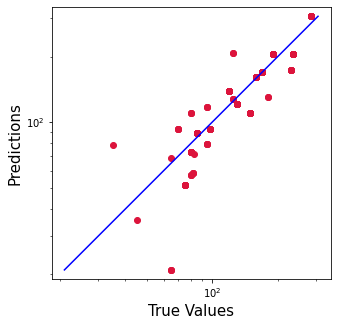

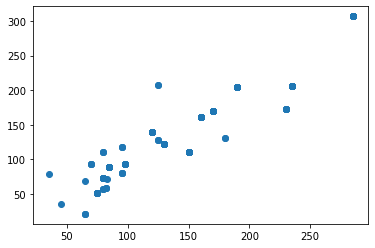

In [13]:
# actual vs predicted

plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_test), max(y_pred))
p2 = min(min(y_test), min(y_pred))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

plt.scatter(y_test, y_pred)  


In [14]:
# combining the predicted value with input
X_test['predicted_rent'] = y_pred
# prediction for all data
scaler = RobustScaler().fit(X[col])
X[col] = scaler.transform(X[col])
y_pred_all = lm_scaled.predict(X)
residuals_all = y - y_pred_all

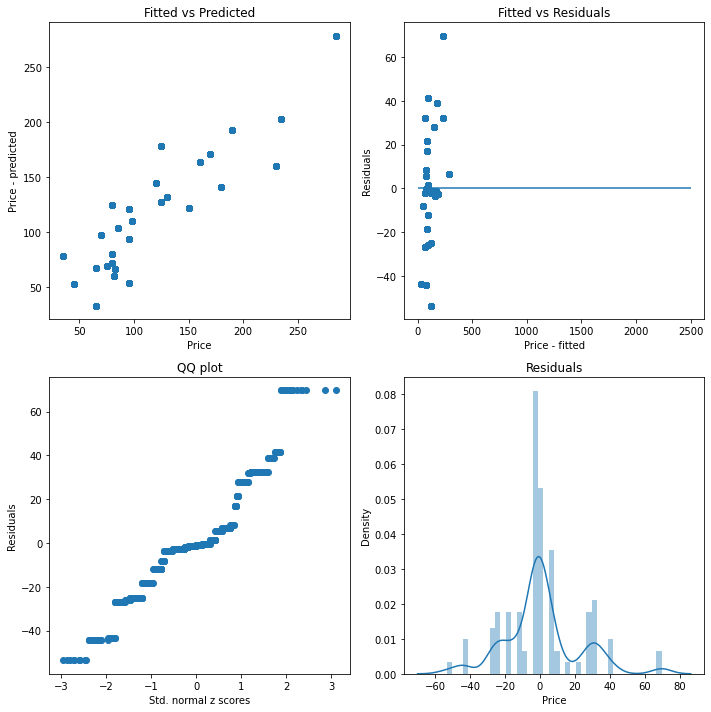

In [15]:
# Evaluate model using charts for all data
fig, axs = plt.subplots(2,2, figsize=(10,10))

plt1 = axs[0][0].scatter(x=y, y=y_pred_all)
axs[0][0].set_title('Fitted vs Predicted')
axs[0][0].set_xlabel('Price')
axs[0][0].set_ylabel('Price - predicted')

plt2 = axs[0][1].scatter(x=y, y=residuals_all)
axs[0][1].hlines(0, xmin=0, xmax=2500)
axs[0][1].set_title('Fitted vs Residuals')
axs[0][1].set_xlabel('Price - fitted')
axs[0][1].set_ylabel('Residuals')

plt3 = axs[1][0].scatter(x=sorted(random.randn(len(residuals_all))), y=sorted(residuals_all))
axs[1][0].set_title('QQ plot')
axs[1][0].set_xlabel('Std. normal z scores')
axs[1][0].set_ylabel('Residuals')

plt4 = sns.distplot(residuals_all, ax=axs[1][1])
axs[1][1].set_title('Residuals')
plt.tight_layout()

In [16]:
# model without zscoring

# Train/test split
X = rent.drop(columns = ['Price'])
y = rent['Price']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [17]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [18]:
# checking R2 for train/test
print(lm.score(X_train, y_train))
print(lm.score(X_test, y_test))

0.8920404976523331
0.8285866179180466


In [19]:
y_pred = lm.predict(X_test)

In [20]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 15.136806830458656
Mean Squared Error: 475.03011981152497
Root Mean Squared Error: 21.795185702616184


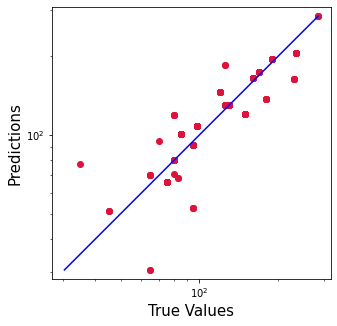

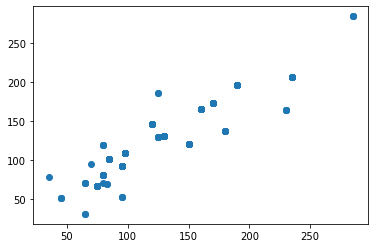

In [21]:
# actual vs predicted

plt.figure(figsize=(5,5))
plt.scatter(y_test, y_pred, c='crimson')
plt.yscale('log')
plt.xscale('log')

p1 = max(max(y_test), max(y_pred))
p2 = min(min(y_test), min(y_pred))
plt.plot([p1, p2], [p1, p2], 'b-')
plt.xlabel('True Values', fontsize=15)
plt.ylabel('Predictions', fontsize=15)
plt.axis('equal')
plt.show()

plt.scatter(y_test, y_pred)  


In [22]:
# combining the predicted value with input
X_test['predicted_rent'] = y_pred
# prediction for all data
y_pred_all = lm.predict(X)
residuals_all = y - y_pred_all

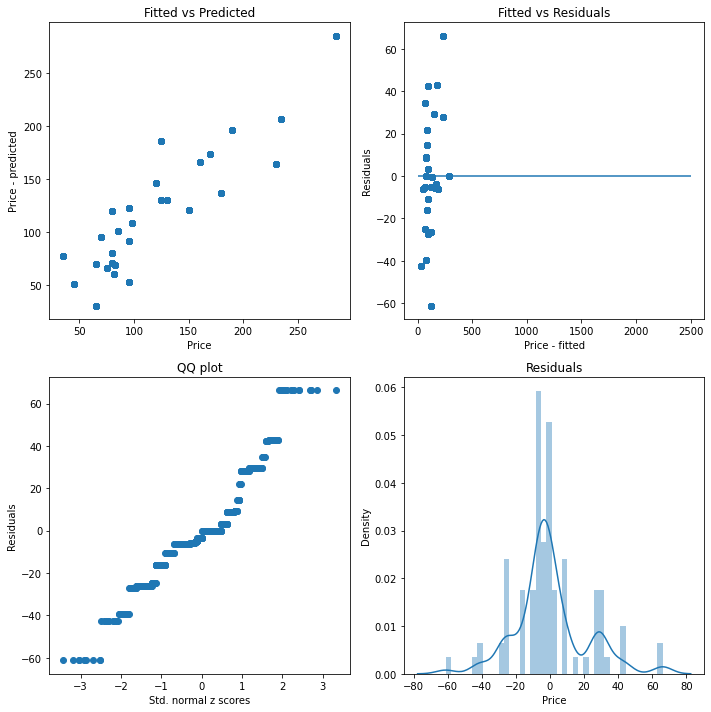

In [23]:
# Evaluate model using charts for all data
fig, axs = plt.subplots(2,2, figsize=(10,10))

plt1 = axs[0][0].scatter(x=y, y=y_pred_all)
axs[0][0].set_title('Fitted vs Predicted')
axs[0][0].set_xlabel('Price')
axs[0][0].set_ylabel('Price - predicted')

plt2 = axs[0][1].scatter(x=y, y=residuals_all)
axs[0][1].hlines(0, xmin=0, xmax=2500)
axs[0][1].set_title('Fitted vs Residuals')
axs[0][1].set_xlabel('Price - fitted')
axs[0][1].set_ylabel('Residuals')

plt3 = axs[1][0].scatter(x=sorted(random.randn(len(residuals_all))), y=sorted(residuals_all))
axs[1][0].set_title('QQ plot')
axs[1][0].set_xlabel('Std. normal z scores')
axs[1][0].set_ylabel('Residuals')

plt4 = sns.distplot(residuals_all, ax=axs[1][1])
axs[1][1].set_title('Residuals')
plt.tight_layout()

In [24]:
df_buy = pd.read_csv('dataset_after_eda.csv')

In [25]:
df_buy.head()

,Price,Prop_type,Size,Bath,Bed,City,Division
0,3500000,1,233,4,4,Maia,Castêlo da Maia
1,980000,1,60,1,2,Paredes,Lordelo
2,1999000,1,188,3,3,Amarante,Telões
3,2350000,1,200,2,3,Marco de Canaveses,Tabuado
4,2500000,1,120,2,5,Gondomar,Rio Tinto


In [26]:
# dropping prop_type , to To adapt the form of the table of properties for purchase to the 
# form of the table of properties for rent
df_buy.drop(['Prop_type', 'Division'],1, inplace=True) 

In [27]:
city_count = df_buy['City'].value_counts()
city_count.head(10)

   Lisboa                 1483
   Sintra                  830
Vila Nova de Gaia          666
   Cascais                 557
Braga                      462
Guimarães                  460
Gondomar                   387
   Vila Franca de Xira     378
   Amadora                 375
Porto                      313
Name: City, dtype: int64

In [28]:
# categorize minor divisions as 'other'
minor_city = list(city_count[city_count <= 380].index)
df_buy['City'] = df_buy['City'].replace(minor_city, 'Other')
df_buy['City'].value_counts()


Other                4202
   Lisboa            1483
   Sintra             830
Vila Nova de Gaia     666
   Cascais            557
Braga                 462
Guimarães             460
Gondomar              387
Name: City, dtype: int64

In [29]:
# creating dummy variables for Division
df_buy = pd.get_dummies(df_buy, drop_first = True)

In [30]:
df_buy.head(15)

,Price,Size,Bath,Bed,City_Gondomar,City_Guimarães,City_Other,City_Vila Nova de Gaia,City_ Cascais,City_ Lisboa,City_ Sintra
0,3500000,233,4,4,0,0,1,0,0,0,0
1,980000,60,1,2,0,0,1,0,0,0,0
2,1999000,188,3,3,0,0,1,0,0,0,0
3,2350000,200,2,3,0,0,1,0,0,0,0
4,2500000,120,2,5,1,0,0,0,0,0,0
5,1950000,134,2,3,0,0,1,0,0,0,0
6,3750000,208,4,6,0,0,1,0,0,0,0
7,3800000,207,3,4,1,0,0,0,0,0,0
8,3385000,158,2,2,0,0,1,0,0,0,0
9,1250000,86,1,3,0,0,1,0,0,0,0


In [31]:
df_buy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9047 entries, 0 to 9046
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   Price                   9047 non-null   int64
 1   Size                    9047 non-null   int64
 2   Bath                    9047 non-null   int64
 3   Bed                     9047 non-null   int64
 4   City_Gondomar           9047 non-null   uint8
 5   City_Guimarães          9047 non-null   uint8
 6   City_Other              9047 non-null   uint8
 7   City_Vila Nova de Gaia  9047 non-null   uint8
 8   City_   Cascais         9047 non-null   uint8
 9   City_   Lisboa          9047 non-null   uint8
 10  City_   Sintra          9047 non-null   uint8
dtypes: int64(4), uint8(7)
memory usage: 344.7 KB


In [32]:
X = df_buy.drop(columns = ['Price'])
df_buy['predicted_rent'] = lm.predict(X)

In [34]:
df_buy.head(20) # rent value added

,Price,Size,Bath,Bed,City_Gondomar,City_Guimarães,City_Other,City_Vila Nova de Gaia,City_ Cascais,City_ Lisboa,City_ Sintra,predicted_rent
0,3500000,233,4,4,0,0,1,0,0,0,0,363.471947
1,980000,60,1,2,0,0,1,0,0,0,0,92.383322
2,1999000,188,3,3,0,0,1,0,0,0,0,306.338078
3,2350000,200,2,3,0,0,1,0,0,0,0,335.595923
4,2500000,120,2,5,1,0,0,0,0,0,0,146.802157
5,1950000,134,2,3,0,0,1,0,0,0,0,206.320172
6,3750000,208,4,6,0,0,1,0,0,0,0,263.992810
7,3800000,207,3,4,1,0,0,0,0,0,0,336.713462
8,3385000,158,2,2,0,0,1,0,0,0,0,278.585061
9,1250000,86,1,3,0,0,1,0,0,0,0,118.054607


In [35]:
df_buy.to_csv(r'buy_with_PredictedRent.csv', index = False, header=True)